In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#funzione che rende un pelo più leggibile il codice
def indice(tail, nodo):
    r = tail.index(nodo)
    return r


#funzione che restituisce il nodo  di distanza minima (dall'array F dei nodi non visitati)
def nodo_con_costo_minore(dict, F):
    costo_minimo = 9999999999999
    nodo_con_costo_minimo = None
    
    for i in dict:
        if dict[i] < costo_minimo and i in F:
            costo_minimo = dict[i]
            nodo_con_costo_minimo = i
    return nodo_con_costo_minimo

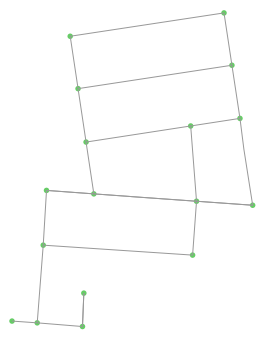

In [4]:
location_point = (40.6802614, -73.9397006)
G = ox.graph_from_point(location_point, distance=250, distance_type='bbox', network_type='drive')
fig, ax = ox.plot_graph(G, node_size=30, node_color='#66cc66')

In [5]:
nodes, edges = ox.graph_to_gdfs(G)

In [26]:
#inizializzo ciò che mi serve ed estraggo dai dataframe i soli dati che mi interessano e li metto in liste
lista_nodi = nodes['osmid'].tolist()
tail = edges['u'].tolist()
head = edges['v'].tolist()
cost = edges['length'].tolist()

# V = lista dei nodi visitati
V = []

# F = lista dei nodi non visitati
F = lista_nodi


'''
    per quanto riguarda il pointer, ho utilizzato un dizionario, non credo di riuscire ad utilizzare una lista visto che i nodi
    del grafo non partono da zero ed hanno ID molto grandi (a meno che non vada a rinominarli).
    il pointer è del tipo {    nodo i    :    [indice del nodo i in tail, numero di archi uscenti da i]}
'''
pointer = {}


for i in lista_nodi:
    if i in tail:
        pointer[i] = [indice(tail,i), tail.count(i)]
    
    # questo else mi serve per mettere nel pointer anche i nodi che non sono coda di nessun arco. Ponendo uguale a zero il
    # secondo elemento dell'array non va a cercare la sua lista di adiacienza visto che è vuota
    else:
        pointer[i] = [0, 0]

'''
    le distanze le ho messe in un dizionario, questo perchè con un array non mi funzionava l'algoritmo. Ora ho capito cosa
    non andava quindi provvederò ad utilizzare un array per un accesso più veloce ai dati.
    lo stesso vale per il dizionario "padre" che memorizza il percorso.
'''
dist = {}
padre = {}


for i in pointer:
    dist[i] = 999999
    padre[i] = None
    
    
print(pointer)
print()
print(dist)
print()
print(padre)

{42464995: [0, 3], 42464999: [3, 4], 42465002: [7, 1], 42467425: [8, 2], 42467431: [10, 2], 42475388: [12, 1], 42475392: [0, 0], 42497847: [13, 2], 42498485: [15, 1], 42499211: [16, 1], 42499213: [17, 1], 42499215: [18, 2], 42502360: [20, 1], 42502371: [21, 2], 42516282: [23, 1], 597826226: [0, 0], 4224536022: [24, 1]}

{42464995: 999999, 42464999: 999999, 42465002: 999999, 42467425: 999999, 42467431: 999999, 42475388: 999999, 42475392: 999999, 42497847: 999999, 42498485: 999999, 42499211: 999999, 42499213: 999999, 42499215: 999999, 42502360: 999999, 42502371: 999999, 42516282: 999999, 597826226: 999999, 4224536022: 999999}

{42464995: None, 42464999: None, 42465002: None, 42467425: None, 42467431: None, 42475388: None, 42475392: None, 42497847: None, 42498485: None, 42499211: None, 42499213: None, 42499215: None, 42502360: None, 42502371: None, 42516282: None, 597826226: None, 4224536022: None}


In [19]:
'''
    L'algortimo Dijkstra source-target che restituisce il cammino minimo ed il costo.
    
    Credo di aver utilizzato correttamente la struttura dati forward star, però mi fa strano che c'è un po' di confusione
    all'interno del ciclo for. Ad ogni modo funziona.
    
'''

def dijkstra(tail, head, cost, pointer, start, goal):
    dist[start] = 0
    
    while goal in F:
                
        current = nodo_con_costo_minore(dist, F)
        V.append(current)
        F.remove(current)
        
        for i in range(pointer[current][1]):
            if cost[pointer[current][0]+i] + dist[current] < dist[head[pointer[current][0]+i]]:
                dist[head[pointer[current][0]+i]] = cost[pointer[current][0]+i] + dist[current]
                padre[head[pointer[current][0]+i]] = current
                
    print('la distanza tra ' + str(start) + ' e '+ str(goal) + ' è di ' + str(dist[goal]))

    #funzione che mi costruisce il percorso dal dizionario "padre"
    parent = [goal]
    num = 0
    while start not in parent:
        parent.append(padre[parent[num]])
        num = num + 1
    result = parent[::-1]
    print(result)
    
    #plotta mappa e soluzione
    fig, ax = ox.plot_graph_route(G, result)

la distanza tra 42464995 e 42516282 è di 490.917
[42464995, 42499215, 42499213, 42499211, 42516282]


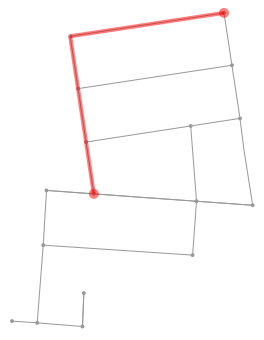

In [27]:
dijkstra(tail, head, cost, pointer, 42464995, 42516282)